# sampley exemplar: Stage 2
Before going through this exemplar, please consult the Introduction to sampley exemplars (```intro.ipynb```).
<br>This exemplar illustrates the classes that can be made in Stage 2, their class methods, their attributes, and their methods. 

## Setup

### Import the package

In [1]:
from sampley import *

### Set the input folder
To run this exemplar, download the mock data files, put them in a folder, and set the path to the folder below.

In [2]:
input_folder = './input/'

### Set the output folder
To run this exemplar, make a folder to save the outputs in and set the path to the folder below.

In [3]:
output_folder = './output/'

### Make DataPoints and Sections objects (Stage 1)
Before making any objects in Stage 2, we, of course, have to conduct Stage 1. For the sake of this exemplar, we make one ```Sections``` and one ```DataPoints``` object below that are then used to make all the subsequent delimiters. See the Stage 1 exemplar and the User Manual for more details.

In [4]:
u_sightings = DataPoints.from_file(
    filepath=input_folder+'sightings.gpkg',
    crs_working='EPSG:32619',
    datetime_col='datetime',
    tz_input='UTC-05:00'
)

Success: file successfully input.
Success: reprojected to CRS 'EPSG:32619'
Success: the column 'datetime' successfully reformatted to datetimes.
Success: the timezone of column 'datetime' successfully set to 'UTC-05:00'.
Success: datapoint IDs successfully generated.


In [5]:
u_sections = Sections.from_file(
    filepath=input_folder+'sections.gpkg',
    crs_working='EPSG:32619',
    datetime_col='datetime_beg',
    tz_input='UTC-05:00'
)

Success: file successfully input.
Success: reprojected to CRS 'EPSG:32619'
Success: the column 'datetime_beg' successfully reformatted to datetimes.
Success: the timezone of column 'datetime_beg' successfully set to 'UTC-05:00'.
Note: column 'datetime_beg' renamed to 'datetime'.
Success: section IDs successfully generated.


## Periods

### Make a ```Periods``` object...
We can make a ```Periods``` object from a ```DataPoints``` or ```Sections``` object with the ```Periods.delimit()``` class method.

In [6]:
u_periods = Periods.delimit(
    extent=u_sections,
    unit='day',
    num=8)

### Access a ```Periods``` object's attributes
A ```Periods``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```periods```) that we can access as follows.

In [7]:
u_periods.name

'periods-8d'

In [8]:
u_periods.parameters

{'periods_tz': 'UTC-05:00',
 'periods_extent': '2019-01-25 00:00:00-2019-03-05 23:59:59',
 'periods_extent_source': 'Sections - sections-sections',
 'periods_number': 8,
 'periods_unit': 'day'}

In [9]:
u_periods.periods

,period_id,datetime_beg,datetime_mid,datetime_end
0,p2019-01-25-8d,2019-01-25 00:00:00-05:00,2019-01-28 23:59:59-05:00,2019-02-01 23:59:59-05:00
1,p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-05 23:59:59-05:00,2019-02-09 23:59:59-05:00
2,p2019-02-10-8d,2019-02-10 00:00:00-05:00,2019-02-13 23:59:59-05:00,2019-02-17 23:59:59-05:00
3,p2019-02-18-8d,2019-02-18 00:00:00-05:00,2019-02-21 23:59:59-05:00,2019-02-25 23:59:59-05:00
4,p2019-02-26-8d,2019-02-26 00:00:00-05:00,2019-03-01 23:59:59-05:00,2019-03-05 23:59:59-05:00


### Save a ```Periods``` object
```Periods``` objects have an inbuilt ```save``` method to save the periods as a CSV.

In [10]:
u_periods.save(folder=output_folder)

## Cells

### Make a ```Cells``` object...
We can make a ```Cells``` object from a ```DataPoints``` or ```Sections``` object with the ```Cells.delimit()``` class method.

In [11]:
u_cells = Cells.delimit(
    extent=u_sections,
    var='hexagonal',
    side=5000,
    buffer=2000)

### Access a ```Cells``` object's attributes
A ```Cells``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```cells```) that we can access as follows.

In [12]:
u_cells.name

'cells-h5000m'

In [13]:
u_cells.parameters

{'cells_crs': 'EPSG:32619',
 'cells_extent': '493765.49253164633, 4689798.086839909, 671300.7003074563, 4759798.086839909',
 'cells_extent_source': 'Sections - sections-sections',
 'cells_var': 'hexagonal',
 'cells_side': 5000,
 'cells_unit': 'metre',
 'cells_buffer': 2000}

In [14]:
u_cells.cells

,cell_id,polygon,centroid
0,c001-h5000m,"POLYGON ((498095.62 4699798.087, 502425.747 46...",POINT (498095.62 4694798.087)
1,c002-h5000m,"POLYGON ((506755.874 4699798.087, 511086.001 4...",POINT (506755.874 4694798.087)
2,c003-h5000m,"POLYGON ((515416.128 4699798.087, 519746.255 4...",POINT (515416.128 4694798.087)
3,c004-h5000m,"POLYGON ((524076.382 4699798.087, 528406.509 4...",POINT (524076.382 4694798.087)
4,c005-h5000m,"POLYGON ((532736.636 4699798.087, 537066.763 4...",POINT (532736.636 4694798.087)
...,...,...,...
175,c176-h5000m,"POLYGON ((627999.43 4759798.087, 632329.557 47...",POINT (627999.43 4754798.087)
176,c177-h5000m,"POLYGON ((636659.684 4759798.087, 640989.811 4...",POINT (636659.684 4754798.087)
177,c178-h5000m,"POLYGON ((645319.938 4759798.087, 649650.065 4...",POINT (645319.938 4754798.087)
178,c179-h5000m,"POLYGON ((653980.192 4759798.087, 658310.319 4...",POINT (653980.192 4754798.087)


### Plot a ```Cells``` object
```Cells``` objects have an inbuilt ```plot``` method to make a simple plot.

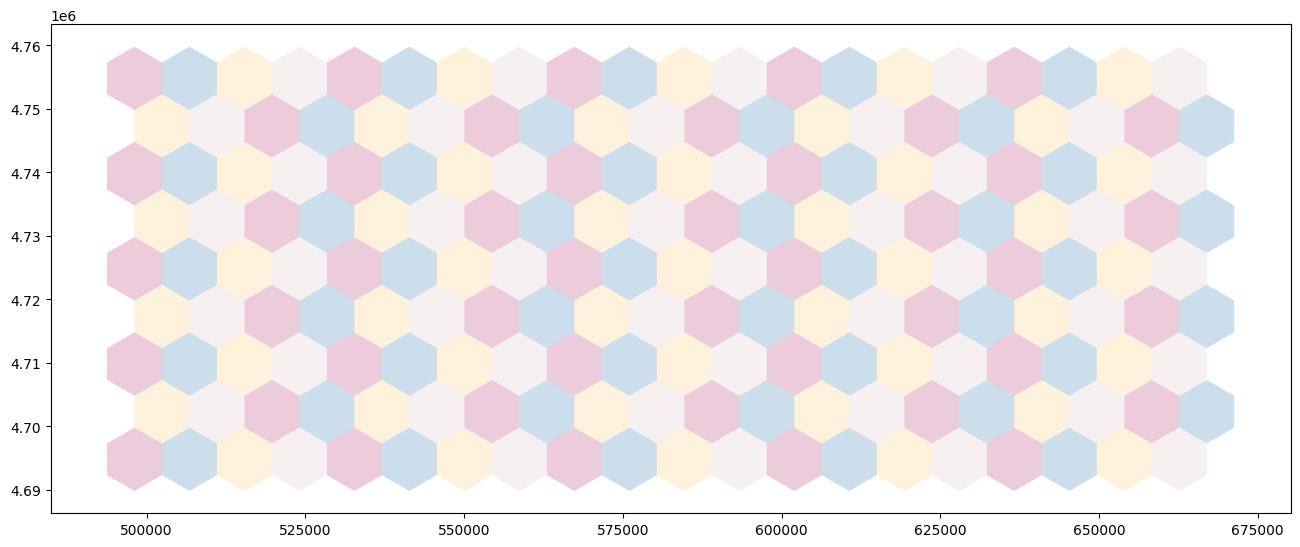

In [15]:
u_cells.plot()

### Save a ```Cells``` object
```Cells``` objects have an inbuilt ```save``` method to save the cells as a GPKG.

In [16]:
u_cells.save(folder=output_folder)

## Segments

### Make a ```Segments``` object...
We can make a ```Segments``` object from a ```Sections``` object with the ```Segments.delimit()``` class method.

In [17]:
u_segments = Segments.delimit(
    sections=u_sections,
    var='simple',
    target=10000,
    randomise=True)

### Access a ```Segments``` object's attributes
A ```Segments``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```segments```) that we can access as follows.

In [18]:
u_segments.name

'segments-s10000m'

In [19]:
u_segments.parameters

{'sections_name': 'sections-sections',
 'segments_crs': 'EPSG:32619',
 'segments_var': 'simple',
 'segments_randomise': True,
 'segments_target': 10000,
 'segments_unit': 'metre'}

In [20]:
u_segments.segments

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end
0,s01-s10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.311 4742845.962),2019-01-25,s1,0.000000,10000.000000
1,s02-s10000m,"LINESTRING (570094.222 4742829.916, 569917.081...",POINT (565094.73 4742799.725),2019-01-25,s1,10000.000000,20000.000000
2,s03-s10000m,"LINESTRING (560095.148 4742773.163, 560090.506...",POINT (560092.827 4742773.143),2019-01-25,s1,20000.000000,20004.642260
3,s04-s10000m,"LINESTRING (560090.506 4742773.123, 559864.339...",POINT (555090.879 4742749.082),2019-01-25,s1,20004.642260,30004.642260
4,s05-s10000m,"LINESTRING (550091.025 4742710.901, 549838.842...",POINT (545091.144 4742676.352),2019-01-25,s1,30004.642260,40004.642260
...,...,...,...,...,...,...,...
68,s69-s10000m,"LINESTRING (652338.76 4697682.02, 652197.878 4...",POINT (647339.987 4697611.472),2019-02-05,s4,274105.324868,284105.324868
69,s70-s10000m,"LINESTRING (642341.15 4697526.723, 641994.147 ...",POINT (637342.194 4697445.552),2019-02-05,s4,284105.324868,294105.324868
70,s71-s10000m,"LINESTRING (632343.125 4697349.07, 632326.134 ...",POINT (627344.065 4697254.461),2019-02-05,s4,294105.324868,304105.324868
71,s72-s10000m,"LINESTRING (622345.629 4697147.973, 622000.67 ...",POINT (617346.364 4697062.225),2019-02-05,s4,304105.324868,314105.324868


### Plot a ```Segments``` object
```Segments``` objects have an inbuilt ```plot``` method to make a simple plot.

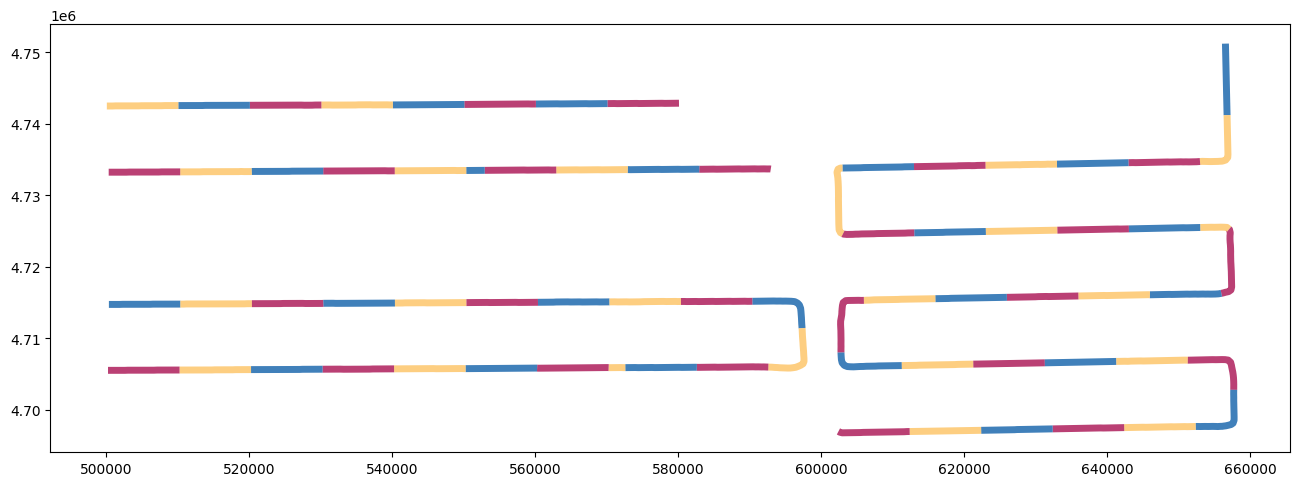

In [21]:
u_segments.plot()

### Save a ```Segments``` object
```Segments``` objects have an inbuilt ```save``` method to save the segments as a GPKG.

In [22]:
u_segments.save(folder=output_folder)

## Presences

### Make a ```Presences``` object...
We can make a ```Presences``` object from a ```DataPoints``` object with the ```Presences.delimit()``` class method.

In [23]:
u_presences = Presences.delimit(
    datapoints=u_sightings,
    presence_col='individuals')

### Thin a ```Presences``` object
We can thin a ```Presences``` object with the ```Presences.thin``` method (based on the ```thinst``` function from the ```thinst``` package).

In [24]:
u_presences.thin(
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day')

### Access a ```Presences``` object's attributes
A ```Presences``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```full```). Two additional attributes will be added after running ```Presences.thin``` (```kept``` and ```removed```). We can access the attributes as follows.

In [25]:
u_presences.name

'presences-sightings'

In [26]:
u_presences.parameters

{'presences_crs': 'EPSG:32619',
 'presences_sp_threshold': 10000,
 'presences_tm_threshold': 5,
 'presences_tm_unit': 'day'}

In [27]:
u_presences.full

,point_id,point,date,datapoint_id
0,p01,POINT (579166.78 4742872.701),2019-01-25,d01
1,p02,POINT (554184.217 4742741.886),2019-01-25,d02
2,p03,POINT (548599.876 4742700.214),2019-01-25,d03
3,p04,POINT (520909.741 4714855.058),2019-02-02,d04
4,p05,POINT (532548.249 4714899.835),2019-02-02,d05
5,p06,POINT (512817.407 4705582.465),2019-02-02,d06
6,p07,POINT (504710.41 4705553.392),2019-02-02,d07
7,p08,POINT (654449.136 4716189.584),2019-02-05,d08
8,p09,POINT (645666.237 4716110.937),2019-02-05,d09
9,p10,POINT (643532.681 4716066.52),2019-02-05,d10


In [28]:
u_presences.kept

,point_id,point,date,datapoint_id
0,p01,POINT (579166.78 4742872.701),2019-01-25,d01
2,p03,POINT (548599.876 4742700.214),2019-01-25,d03
3,p04,POINT (520909.741 4714855.058),2019-02-02,d04
4,p05,POINT (532548.249 4714899.835),2019-02-02,d05
6,p07,POINT (504710.41 4705553.392),2019-02-02,d07
7,p08,POINT (654449.136 4716189.584),2019-02-05,d08
9,p10,POINT (643532.681 4716066.52),2019-02-05,d10
10,p11,POINT (629124.489 4706545.106),2019-02-05,d11
12,p13,POINT (611976.857 4696974.111),2019-02-05,d13


In [29]:
u_presences.removed

,point_id,point,date,datapoint_id
1,p02,POINT (554184.217 4742741.886),2019-01-25,d02
5,p06,POINT (512817.407 4705582.465),2019-02-02,d06
8,p09,POINT (645666.237 4716110.937),2019-02-05,d09
11,p12,POINT (620560.818 4697116.949),2019-02-05,d12


### Plot a ```Presences``` object
```Presences``` objects have an inbuilt ```plot``` method to make a simple plot.
<br>We can set the parameter ```which``` to determine which of the attributes ```full```, ```kept```, or ```removed``` to plot (note that ```which='thinned'``` will plot both ```kept``` and ```removed```).

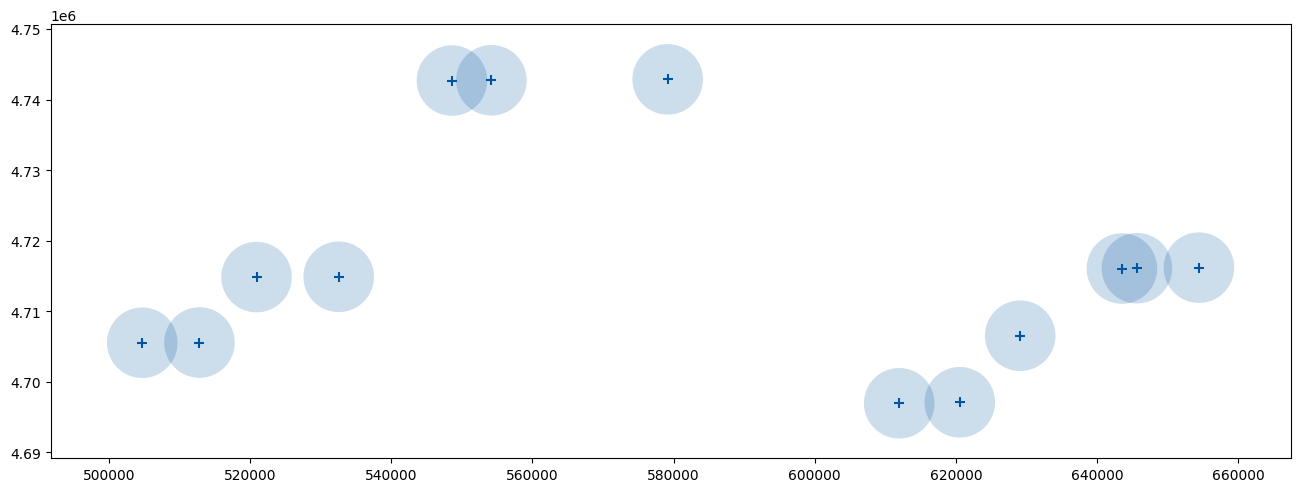

In [30]:
u_presences.plot(sp_threshold=10000, which='full')

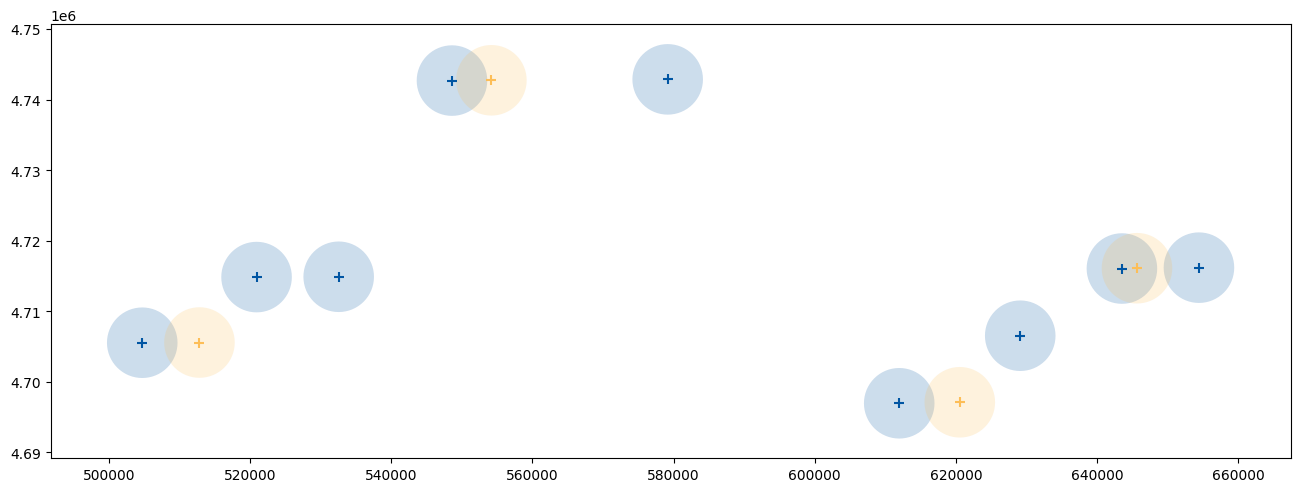

In [31]:
u_presences.plot(sp_threshold=10000, which='thinned')

### Save a ```Presences``` object
```Presences``` objects have an inbuilt ```save``` method to save the presences as a GPKG.

In [32]:
u_presences.save(folder=output_folder)

## AbsenceLines
Please note: the Presences section of this notebook must be run before running this section

### Make an ```AbsenceLines``` object...
We can make an ```AbsenceLines``` object from a ```Sections``` object and a ```Presences``` object with the ```AbsenceLines.delimit()``` class method.

In [33]:
u_absencelines = AbsenceLines.delimit(
    sections=u_sections,
    presences=u_presences,
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day',
)

Note: absence lines to be generated with a temporal threshold of 5 day(s).


### Access an ```AbsenceLines``` object's attributes
A ```AbsenceLines``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```absencelines```) that we can access as follows.

In [34]:
u_absencelines.name

'absencelines-10000m-5day'

In [35]:
u_absencelines.parameters

{'absences_crs': 'EPSG:32619',
 'absences_sp_threshold': 10000,
 'absences_tm_threshold': 5,
 'absences_tm_unit': 'day'}

In [36]:
u_absencelines.absencelines

,section_id,date,absencelines,presencezones
0,s1,2019-01-25,"MULTILINESTRING ((569169.341 4742820.563, 5691...","MULTIPOLYGON (((589166.78 4742872.701, 589118...."
1,s2,2019-03-03,"LINESTRING (592927.566 4733678.432, 592818.466...",None
2,s3,2019-02-02,"MULTILINESTRING ((500383.195 4714750.316, 5007...","MULTIPOLYGON (((616117.835 4706064.327, 616733..."
3,s4,2019-02-05,"MULTILINESTRING ((656499.299 4751214.73, 65650...","MULTIPOLYGON (((616117.835 4706064.327, 616733..."


### Plot an ```AbsenceLines``` object
```AbsenceLines``` objects have an inbuilt ```plot``` method to make a simple plot.

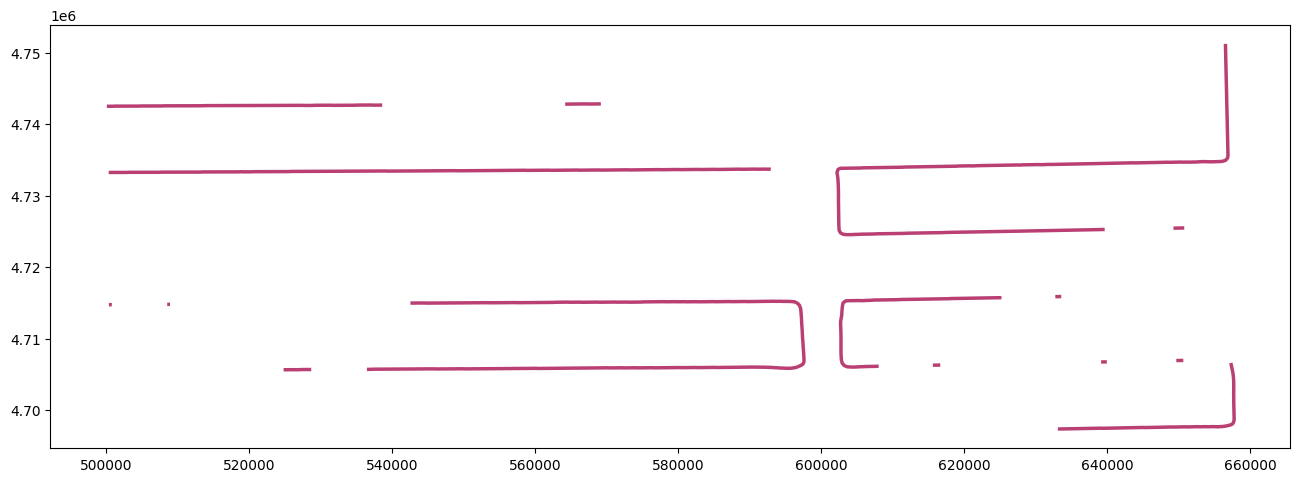

In [37]:
u_absencelines.plot()

### Save an ```AbsenceLines``` object
```AbsenceLines``` objects have an inbuilt ```save``` method to save the absencelines as a GPKG.

In [38]:
u_absencelines.save(folder=output_folder)

## Absences
Please note: the AbsenceLines sections of this notebook must be run before running this section

### Make an ```Absences``` object...
We can make an ```Absences``` object from an ```AbsenceLines``` object with the ```Absences.delimit()``` class method.

In [39]:
u_absences = Absences.delimit(
    absencelines=u_absencelines,
    var='along',
    target=20)

### Thin an ```Absences``` object
We can thin a ```Absences``` object with the ```Absences.thin``` method (based on the ```thinst``` function from the ```thinst``` package).

In [40]:
u_absences.thin(
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day',
    target=9)

### Access an ```Absences``` object's attributes
A ```Absences``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```full```). Two additional attributes will be added after running ```Absences.thin``` (```kept``` and ```removed```). We can access the attributes as follows.

In [41]:
u_absences.name

'absences-a-10000m-5day'

In [42]:
u_absences.parameters

{'absences_var': 'along',
 'absences_target': 20,
 'absences_crs': 'EPSG:32619',
 'absences_sp_threshold': 10000,
 'absences_tm_threshold': 5,
 'absences_tm_unit': 'day'}

In [43]:
u_absences.full

,point_id,point,date
0,a01,POINT (525611.358 4742614.116),2019-01-25
1,a02,POINT (516982.782 4742587.433),2019-01-25
2,a03,POINT (508903.332 4742553.371),2019-01-25
3,a04,POINT (502650.162 4742511.483),2019-01-25
4,a05,POINT (582868.887 4715151.256),2019-02-02
5,a06,POINT (583861.308 4715163.168),2019-02-02
6,a07,POINT (574832.389 4705917.01),2019-02-02
7,a08,POINT (656539.655 4749442.973),2019-02-05
8,a09,POINT (644063.148 4734574.69),2019-02-05
9,a10,POINT (628434.437 4734302.998),2019-02-05


In [44]:
u_absences.kept

,point_id,point,date
0,a01,POINT (525611.358 4742614.116),2019-01-25
5,a06,POINT (583861.308 4715163.168),2019-02-02
8,a09,POINT (644063.148 4734574.69),2019-02-05
10,a11,POINT (620311.302 4734156.706),2019-02-05
13,a14,POINT (625116.703 4724985.617),2019-02-05
14,a15,POINT (606559.799 4715345.419),2019-02-05
15,a16,POINT (616400.071 4706302.006),2019-02-05
16,a17,POINT (559904.738 4733535.195),2019-03-03
18,a19,POINT (543837.38 4733451.176),2019-03-03


In [45]:
u_absences.removed

,point_id,point,date
1,a02,POINT (516982.782 4742587.433),2019-01-25
2,a03,POINT (508903.332 4742553.371),2019-01-25
3,a04,POINT (502650.162 4742511.483),2019-01-25
4,a05,POINT (582868.887 4715151.256),2019-02-02
6,a07,POINT (574832.389 4705917.01),2019-02-02
7,a08,POINT (656539.655 4749442.973),2019-02-05
9,a10,POINT (628434.437 4734302.998),2019-02-05
11,a12,POINT (612937.287 4724757.433),2019-02-05
12,a13,POINT (614542.848 4724783.799),2019-02-05
17,a18,POINT (552945.343 4733497.219),2019-03-03


### Plot an ```Absences``` object
```Absences``` objects have an inbuilt ```plot``` method to make a simple plot.
<br>We can set the parameter ```which``` to determine which of the attributes ```full```, ```kept```, or ```removed``` to plot (note that ```which='thinned'``` will plot both ```kept``` and ```removed```).

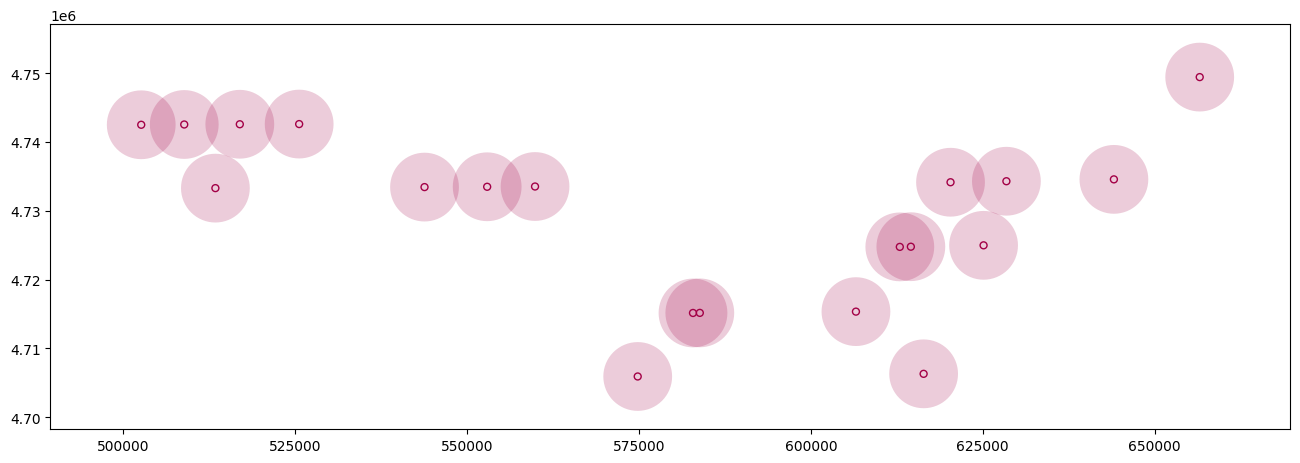

In [46]:
u_absences.plot(sp_threshold=10000, which='full')

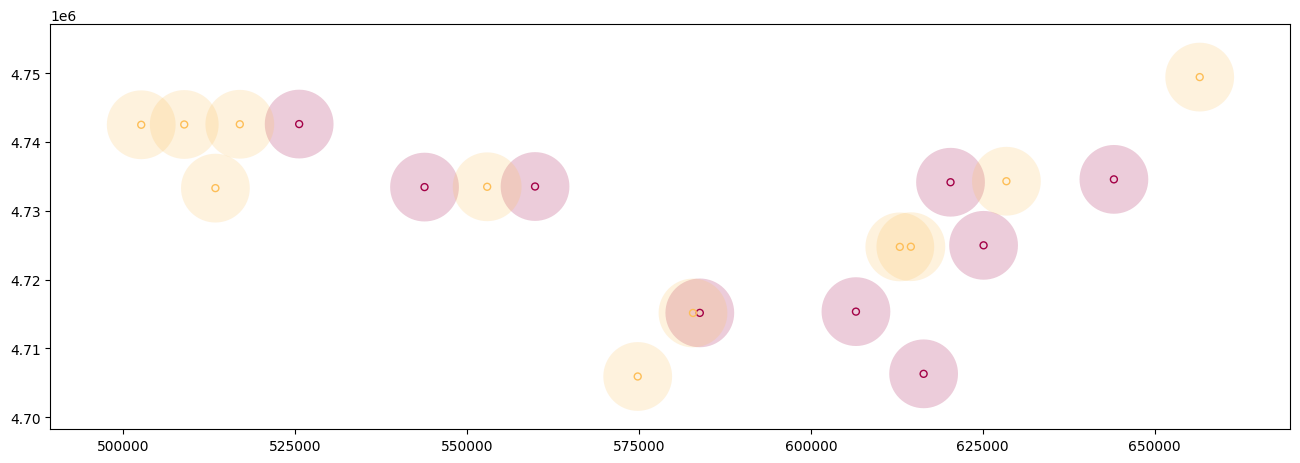

In [47]:
u_absences.plot(sp_threshold=10000, which='thinned')

### Save an ```Absences``` object
```Absences``` objects have an inbuilt ```save``` method to save the absences as a GPKG.

In [48]:
u_absences.save(folder=output_folder)